# K-mean

Le partitionnement en k-moyennes (ou k-means) est une méthode de clustering (regroupement de données) très utilisé en apprentissage non supervisé.

Étant donnés des points et un entier k, l'algorithme vise à diviser les points en k groupes, appelés clusters, homogènes et compacts.

L'algorithme est décrit par le pseudo-code suivant :

- Choisir k centroïdes aléatoirement
- Calculer les distances avec les k-centroïdes pour chaque point du dataset
- Assigner chaque point au centroïde le plus proche
- Actualiser les centroïdes comme centre des nouveaux cluster obtenus
- Répéter les opérations précédentes jusqu'à ce que les centroïdes convergent

# Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('data/ruspini.csv',index_col='rownames')
df.head()

,x,y
rownames,,
1,4,53
2,5,63
3,10,59
4,9,77
5,13,49


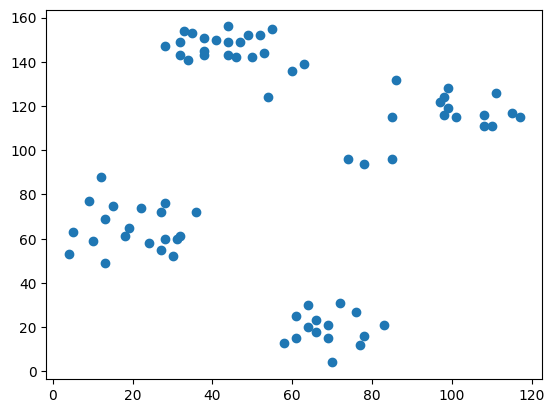

In [8]:
plt.scatter(df.x,df.y)

C:\Users\lyhen\AppData\Local\Temp\ipykernel_3264\2181833733.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df.x,df.y],labels=['x','y']);


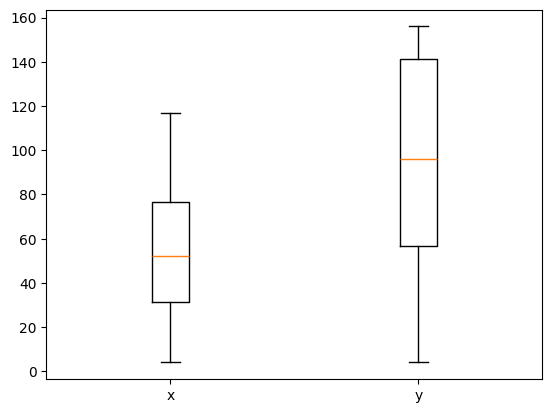

In [9]:
plt.boxplot([df.x,df.y],labels=['x','y']);

In [10]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=2)
clf.fit(df)

centroids = clf.cluster_centers_
labels = clf.labels_

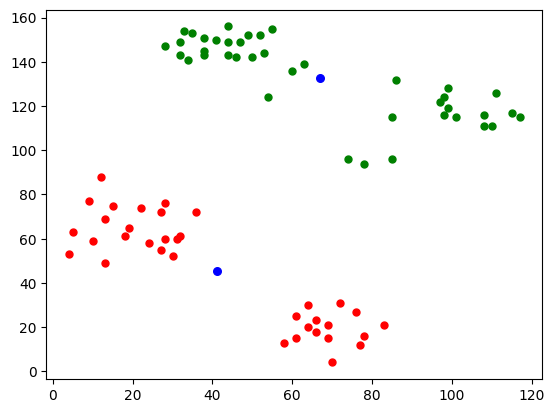

In [11]:
colors = ["g.","r."]

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()


# Méthode du coude (Elbow Method)

Au vu du graphique ci-dessus, le choix de $K = 2$ ne paraît pas optimal car certains points sont éloignés des autres points de leur cluster.

Le nombre de clusters n'est généralement pas connu *a priori*, néanmoins le choix de $K$ est critique pour les résultats de l'algorithme **K-Means**.

Afin de trouver le nombre de clusters optimal, la méthode du coude (*Elbow Method*) permet d'obtenir le meilleur partitionnement des données.

Pour cela, il faut trouver le nombre $K$ qui minimise la somme des carrés des distances de chaque point à son centroïde à l'intérieur de chaque cluster, notée **SSW** (*Sum of Squares Within clusters*). En effet, pour une valeur faible de **SSW**, les clusters sont plus compacts.

Pour que les clusters soient bien séparés, il faut maximiser la somme des carrés des distances entre les clusters, notée **SSB** (*Sum of Squares Between clusters*).

Notons que lorsque le nombre de clusters augmente, **SSW** décroît tandis que **SSB** augmente. Ainsi, le choix du nombre de clusters optimal $K$ correspond à un arbitrage entre la compacité des clusters et leur séparation.

Selon les caractéristiques du problème posé, le choix de $K$ s'effectue donc en utilisant la technique suivante :

### Méthode du coude

- Tracer la courbe de la distorsion en fonction de $K$, définie par :

$$
\text{distorsion} = \frac{SSW}{SSW + SSB}
= \frac{1}{n} \sum_{i=1}^{n} \text{dist}(x_i, c_i)
$$

où :
- $x_i$ correspond à l'observation $i$ du jeu de données,
- $c_i$ correspond au centroïde associé à $x_i$,
- $n$ correspond au nombre total d'observations.

- Rechercher un décrochement sur la courbe (*coude*), caractérisé par une décroissance rapide suivie d'une décroissance plus régulière.
- Considérer le premier entier supérieur ou égal au point de décrochement comme le nombre de clusters optimal $K$.


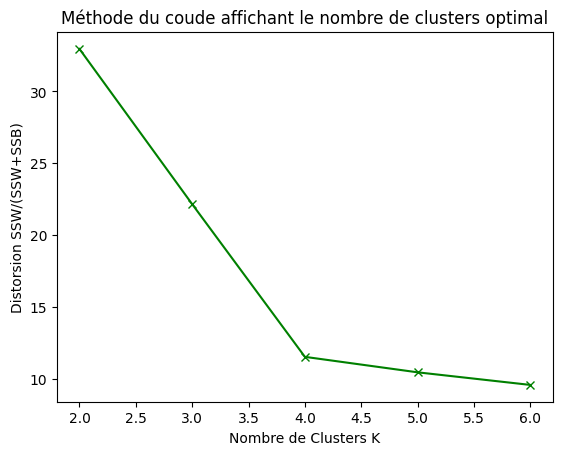

In [12]:
from scipy.spatial.distance import cdist
range_n_clusters = [2, 3, 4, 5, 6]  
distorsions = []

for n in range_n_clusters:
    cluster = KMeans(n_clusters=n)
    cluster.fit(df)
    distorsions.append(sum(np.min(cdist(df, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(df, axis = 0))

plt.plot(range_n_clusters, distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()

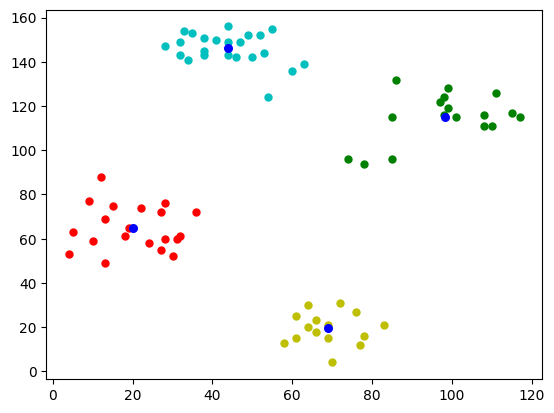

In [15]:
clf = KMeans(n_clusters=4)
clf.fit(df)

centroids = clf.cluster_centers_
labels = clf.labels_

colors = ["g.","r.","c.","y."]

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()
